## Modificación de la ecuación de Tait, la velocidad de sonido artificial y la viscosidad.

Haciendo una revisión superficial con ChatGPT encontramos los siguientes errores pequeños que pueden producir inestabilidades numéricas y que no permiten el uso de los valores realistas de B,c. Haremos un estudio detallado de como estos valores se representan en la literatura y haremos las correcciones necesarias para llevar a cabo la implementación con valores que tengan sentido físico.

- Viscosidad artificial demasiado débil (α,β ≪ 0.1)

- c grande con Δt probablemente demasiado grande

- Uso de c constante desacoplado de la EOS

- Presión rígida en fronteras

- $\epsilon^2$ demasiado pequeño en $\phi_{ij}$


### 1. Valores de $\alpha$ y $\beta$ encontrados en la literatura.

Encontramos en Becker & Teschenner (2007) que usan un modelo lineal para la viscosidad artificial que solo depende de un parámetro $\alpha$.

$\Pi_{ab}$ =
\begin{cases}
-\nu \dfrac{\mathbf{v}_{ab}\cdot\mathbf{x}_{ab}}
{|\mathbf{x}_{ab}|^2 + \varepsilon h^2},
& \text{si } \mathbf{v}_{ab}\cdot\mathbf{x}_{ab} < 0, \\[8pt]
0,
& \text{si no}.
\end{cases}

Donde

$$ \nu = \frac{2 \alpha h c_s}{\rho_a + \rho_b} $$

Y:

$$ \alpha \in [0.08, 0.5],\ \epsilon = 0.01 $$

Hacemos los cambios necesarios para incluir esta nueva función dentro de los códigos hasta ahora trabajados.

**Según se entiende WCSPH no trabaja con la energía interna solo con las ecuaciones de conservación de la masa y del momentum**

### 2. Valor del $\Delta t$ basado en Becker & Teschner (2007).

Anteriormente, habíamos determinado que el valor de $\Delta t$ estaba asociado a los parámetros de $\alpha$ y $\beta$, y que rondaba los $3.5 \times 10^{-5}\ s$. Ahora, que existe uno solo de esos parámetros haremos uso de la ecuación:

$$ \Delta t = min \left( 0.25 \cdot min \left(\frac{h}{|f_a|} \right), 0.4\ \cdot \frac{h}{c_s\ (1 + 0.6\alpha)} \right) $$

Donde $f_a$ denota fuerzas externas.

Para hallar la velocidad de sonido artificial tenemos que:

$$ c_s \geq \frac{v_{max}}{\sqrt{\eta}} $$

Donde $\eta = 0.01$, $v_{max} = \sqrt{2 \cdot (9.8m/s^2)\ (1m)} = 4.43\ m/s$.

Pues la velocidad máxima que alcanza es en el vaciado de tanque correspondiente a la caída del agua.

Por lo que tenemos que $c_s \approx 10\ v_{max} = 44.27\ m/s$




In [2]:
h = 2.75e-3
mass = 6.25e-3
fa = 9.8*mass
c_s = 44.27
alpha = 0.1

import numpy as np

delta_t = min(0.25 * h/(fa),0.4*h/(c_s*(1+0.6*alpha)))

print(delta_t)

2.344106277516611e-05


Seguimos aún en el orden de $2 \times 10^{-5}$, por lo que podemos decir, que el tiempo de integración no se encontraba mal anteriormente.

### 3. Uso de c como una constante desacoplada de la EOS.

Basado en la recomendación de ChatGPT se debería hacer uso de una velocidad del sonido variable, podemos comparar la ecuación que este nos dió correspondiente a:

$$ c = \sqrt{\gamma \frac{p}{\rho}} $$

Con la ecuación que se encuentra en Eirís, A. Ramírez, L. et al (2021) :
![Captura desde 2025-12-22 21-04-00.png](<attachment:Captura desde 2025-12-22 21-04-00.png>)
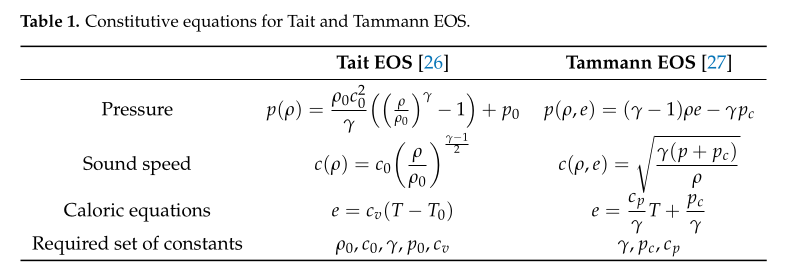

También, se tiene que sobre la frontera si se necesita hacer un cálculo de presión ya que esta se extrapola desde el fluido y por lo tanto, cambia con el tiempo.

Siguiendo la referecia de Adami, S. (2012) tenemos que la presión que experimentan las partículas de frontera están dadas por:

$$ p_w = \frac{\sum_f p_f W_{wf} + (\vec{g} - \vec{a_w}) \cdot \sum_f \rho_f \vec{r}_{wf} W_{wf}}{\sum_f W_{wf}} $$

**Nota:** Leer adecuadamente la sección 4. Solid wall boundary

Donde la aceleración de la frontera en este caso es 0 $\vec{a_w} = 0$.

También se añade dentro de las ecuaciones de Navier-Stockes el aporte de presión que estas hacen al fluido pues esto es la repulsión misma, por lo que se elimina el cálculo del potencial de Lenard-Jones.


**Nota:** Por ahora no hacemos una modificación sobre el valor de c, y se sigue pasando como parámetro.